# DUYGU TANIMA - KAGGLE VERİ KÜMESİ

**Kaynak:** [KAGGLE- Challenges in Representation Learning: Facial Expression Recognition Challenge](https://www.kaggle.com/c/challenges-in-representation-learning-facial-expression-recognition-challenge/data)

**Ek kaynaklar:** 

1. [Ön İşlemler](https://github.com/Hanzhuo/Facial-Expression-Recognition-with-TensorFlow-Convolutional-Neural-Networks/blob/master/CNN_Facial_Expression_Recogonition.ipynb)
2. [Eğitim ve Model](https://github.com/piyush2896/Facial-Expression-Recognition-Challenge/blob/master/Facial-Expression-Recognition-Challenge.ipynb)
3. [Görselleştirme ve ek tanımlamalar](https://github.com/sachin-kmr/ML-Facial-Expression-Recognition/blob/master/exp_recognition.ipynb)
4. [**Destekleyici Blog Yazısı** - Furkan Kınlı - Deep Learning Türkiye](https://medium.com/deep-learning-turkey/deep-learning-lab-episode-3-fer2013-c38f2e052280)

---

[<img align="left" width="100" height="100" src="http://www.i2symbol.com/images/symbols/style-letters/circled_latin_capital_letter_a_u24B6_icon_128x128.png">](https://www.ayyucekizrak.com/)
[<img align="right" width="200" height="50"  src="https://raw.githubusercontent.com/deeplearningturkiye/pratik-derin-ogrenme-uygulamalari/944a247d404741ba37b9ef74de0716acff6fd4f9/images/dltr_logo.png">](https://deeplearningturkiye.com/)

Drive Hesap Doğrulama

In [1]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

Preconfiguring packages ...
Selecting previously unselected package cron.
(Reading database ... 18408 files and directories currently installed.)
Preparing to unpack .../00-cron_3.0pl1-128ubuntu5_amd64.deb ...
Unpacking cron (3.0pl1-128ubuntu5) ...
Selecting previously unselected package libapparmor1:amd64.
Preparing to unpack .../01-libapparmor1_2.11.0-2ubuntu17.1_amd64.deb ...
Unpacking libapparmor1:amd64 (2.11.0-2ubuntu17.1) ...
Selecting previously unselected package libdbus-1-3:amd64.
Preparing to unpack .../02-libdbus-1-3_1.10.22-1ubuntu1_amd64.deb ...
Unpacking libdbus-1-3:amd64 (1.10.22-1ubuntu1) ...
Selecting previously unselected package dbus.
Preparing to unpack .../03-dbus_1.10.22-1ubuntu1_amd64.deb ...
Unpacking dbus (1.10.22-1ubuntu1) ...
Selecting previously unselected package dirmngr.
Preparing to unpack .../04-dirmngr_2.1.15-1ubuntu8.1_amd64.deb ...
Unpacking dirmngr (2.1.15-1ubuntu8.1) ...
Selecting previously unselected package distro-info-data.
Preparing to unpack .

In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive

In [3]:
import os 
os.chdir("/content/drive/")
!pwd
!ls

/content/drive
araguler.jpg				  Python_Giris.ipynb
Colab_Kullanım				  Python Numpy Giriş
Colab Notebooks				  RakamTanima
dinazor					  StyleTransfer
DuyguTanima				  TBMM_Corpus
EvrisimliSinirAglari			  titanic
GitHub-Colab.ipynb			  Udemy_DerinOgrenmeyeGiris
KapsulAglari_MNIST.ipynb		  VeriArtirma
NesneTanima				  Veri_Artirma
pratik-derin-ogrenme-uygulamalari-master  YOLO_NesneYeriTespiti


In [4]:
!ls Udemy_DerinOgrenmeyeGiris/Evrisimli_Sinir_Aglari/Duygu_Tanima

data			 DuyguTanima_Demo2.ipynb  images
DuyguTanima_Demo1.ipynb  duygutanima_demo2.py	  utils


### **UYGULAMA BAŞLANGICI**
Gerekli paketlerin yüklenmesi...

In [5]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

import keras
from keras.models import Sequential, Model, model_from_json
from keras.layers import Dense, Conv2D, Activation, MaxPool2D, Flatten, Dropout, BatchNormalization
from keras.utils import np_utils
from keras.preprocessing import image
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


**Veri setinin okunması...**

Bize verilen veriseti **35887 ** satır ve **3** sütundan oluşuyor.

In [6]:
root = 'Udemy_DerinOgrenmeyeGiris/Evrisimli_Sinir_Aglari/Duygu_Tanima/'

data = pd.read_csv(root + "data/fer2013/fer2013.csv")
data.shape 

(35887, 3)

**Veriden bir kısım görelim!**

In [7]:
data.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


**Eğitim ve test performansının ölçüldüğü veri sayılarını inceleyelim.**

In [8]:
data["Usage"].value_counts()

Training       28709
PrivateTest     3589
PublicTest      3589
Name: Usage, dtype: int64

**Usage** kolonunda verisetindeki örnekler kaç gruba ayrıldığını görebiliriz. 
[Kaggle](https://www.kaggle.com/c/challenges-in-representation-learning-facial-expression-recognition-challenge/data)da genelde bu şekilde submit sonrası asıl test edilmesi için verisetinden bir kısmını **"PrivateTest"** olarak ayırırlar.

### **EĞİTİM VERİSİ İÇİN ÖN İŞLEME ADIMLARI**

In [9]:
np.unique(data["Usage"].values.ravel()) 

print('Eğitim verisetindeki örnek sayısı: %d'%(len(data[data.Usage == "Training"])))

Eğitim verisetindeki örnek sayısı: 28709


Eğitim işlemi için veri kümesinde ayrılmış olan **Training** kısmını alıyoruz.

In [0]:
train_data = data[data.Usage == "Training"] #sadece eğitim örneklerini train_data değişkenine aldık

In [11]:
#eğitim örneklerinin piksel değerleri bize tablo halinde yan yana verildiği için boşluklardan parse ederek liste olarak değişkene aldık
train_pixels = train_data.pixels.str.split(" ").tolist() 

train_pixels = pd.DataFrame(train_pixels, dtype=int)
train_images = train_pixels.values
train_images = train_images.astype(np.float)

print(train_images)

print(train_images.shape)

[[ 70.  80.  82. ... 106. 109.  82.]
 [151. 150. 147. ... 193. 183. 184.]
 [231. 212. 156. ...  88. 110. 152.]
 ...
 [ 74.  81.  87. ... 188. 187. 187.]
 [222. 227. 203. ... 136. 136. 134.]
 [195. 199. 205. ...   6.  15.  38.]]
(28709, 2304)


In [0]:
#Görüntüyü 48x48 piksel şeklinde göstermek için bir fonksiyon tanımlayalım
def show(img):
    show_image = img.reshape(48,48)
    
    plt.axis('off')
    plt.imshow(show_image, cmap='gray')

**Eğitim kümesinden bir örnek görsel**

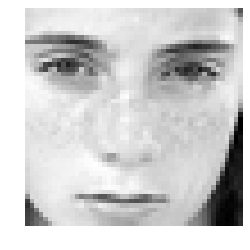

In [13]:
#Veri kümesinden 
show(train_images[28708])

**Eğitim kümesinde kaç sınıf bulunuyor bunu görelim.**

In [14]:
train_labels_flat = train_data["emotion"].values.ravel()
train_labels_count = np.unique(train_labels_flat).shape[0]
print('Farklı yüz ifadelerinin sayısı: %d'%train_labels_count)

Farklı yüz ifadelerinin sayısı: 7


**One Hot ile eğitim kümesindeki verilerin her birine düşen sınıfı yani eğitim işlemi boyutunu görelim.**

In [0]:
def dense_to_one_hot(labels_dense, num_classes):
    num_labels = labels_dense.shape[0]
    index_offset = np.arange(num_labels) * num_classes
    labels_one_hot = np.zeros((num_labels, num_classes))
    labels_one_hot.flat[index_offset + labels_dense.ravel()] = 1
    return labels_one_hot

In [16]:
y_train = dense_to_one_hot(train_labels_flat, train_labels_count)
y_train = y_train.astype(np.uint8)

print(y_train.shape)

(28709, 7)


### TEST VERİSİ ÖN İŞLEME ADIMLARI

In [17]:
np.unique(data["Usage"].values.ravel()) 

print('Test verisetindeki örnek sayısı: %d'%(len(data[data.Usage == "PublicTest"])))

Test verisetindeki örnek sayısı: 3589


Eğitim işlemi için veri kümesinde ayrılmış olan **PublicTest** kısmını alıyoruz.

In [18]:

test_data = data[data.Usage == "PublicTest"] 
test_pixels = test_data.pixels.str.split(" ").tolist() 

#test örneklerinin piksel değerleri bize tablo halinde yan yana verildiği için boşluklardan parse ederek liste olarak değişkene aldık
test_pixels = pd.DataFrame(test_pixels, dtype=int)
test_images = test_pixels.values
test_images = test_images.astype(np.float)

print(test_images.shape)


(3589, 2304)


**Eğitim kümesinden bir örnek görsel**

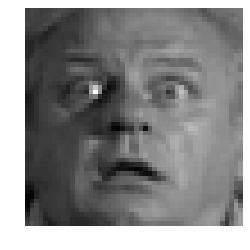

In [19]:
#bir test örneği gösterelim
show(test_images[1000])

**One Hot ile test kümesindeki verilerin her birine düşen sınıfı yani eğitim işlemi boyutunu görelim.**

In [20]:
test_labels_flat = test_data["emotion"].values.ravel()
test_labels_count = np.unique(test_labels_flat).shape[0]

y_test = dense_to_one_hot(test_labels_flat, test_labels_count)
y_test = y_test.astype(np.uint8)


print(y_test.shape)

(3589, 7)


### TEST KÜMESİNDEN ÖRNEK GÖRÜNTÜLER

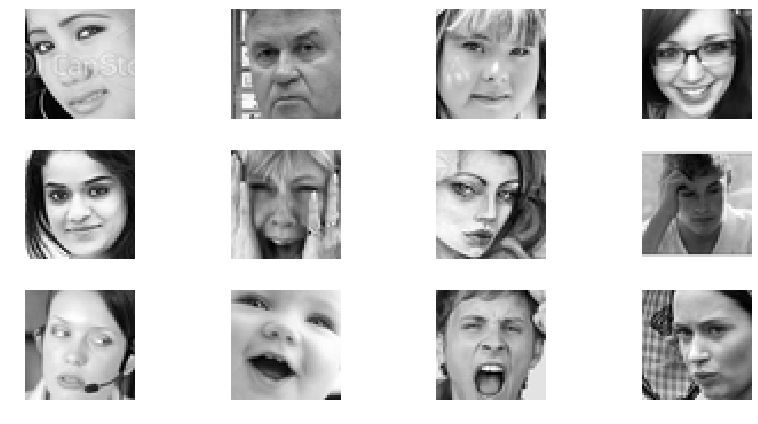

In [21]:
#test verisetinden örneklerden bir kaçını toplu halde görelim

plt.figure(0, figsize=(12,6))
for i in range(1, 13):
    plt.subplot(3,4,i)
    plt.axis('off')
    
    image = test_images[i].reshape(48,48)
    plt.imshow(image, cmap="gray")

plt.tight_layout()
plt.show()

## DERİN EVRİŞİMLİ SİNİR AĞI MODELİ TANIMLANMASI

In [22]:
model = Sequential()

#1. KATMAN
model.add(Conv2D(64, 3, data_format="channels_last", kernel_initializer="he_normal", input_shape=(48, 48, 1)))
model.add(BatchNormalization())
model.add(Activation("relu"))

#2. KATMAN
model.add(Conv2D(64, 3))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.6)) #%60 unutma işlemi(nöron silme-dropout)

#3. KATMAN
model.add(Conv2D(32, 3))
model.add(BatchNormalization())
model.add(Activation("relu"))

#4. KATMAN
model.add(Conv2D(32, 3))
model.add(BatchNormalization())
model.add(Activation("relu"))

#5. KATMAN
model.add(Conv2D(32, 3))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.6))#%60 unutma işlemi(nöron silme-dropout)

#TAM BAĞLANTI KATMANI
model.add(Flatten())
model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.6)) #%60 unutma işlemi(nöron silme-dropout)

#Çıkış katmanı
model.add(Dense(7))
model.add(Activation('softmax')) #Sınıflama işlemi (7 duygu sınıfı var)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) #opmizasyon ve başarım hesaplama metriklerinin belirlenmesi
model.summary() #model özetini görselleştirelim

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 46, 46, 64)        640       
_________________________________________________________________
batch_normalization_1 (Batch (None, 46, 46, 64)        256       
_________________________________________________________________
activation_1 (Activation)    (None, 46, 46, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 44, 44, 64)        36928     
_________________________________________________________________
batch_normalization_2 (Batch (None, 44, 44, 64)        256       
_________________________________________________________________
activation_2 (Activation)    (None, 44, 44, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 22, 22, 64)        0         
__________

**Eğtim ve Test kümelerinin eleman sayısı, yükseklik ve genişlik, kanalsayısı bilgilerini ekrana yazdıralım.**

In [23]:
x_train = train_images.reshape(-1, 48, 48, 1)
x_test = test_images.reshape(-1, 48, 48, 1)

print("Train:", x_train.shape)
print("Test:", x_test.shape)

Train: (28709, 48, 48, 1)
Test: (3589, 48, 48, 1)


**Eğitim ve Test kümelerinin eleman ve duygu sınıf sayısı.**

In [24]:
print("Train:", y_train.shape)
print("Test:", y_test.shape)

Train: (28709, 7)
Test: (3589, 7)


**Eğitim işleminin gerçekleşmesini istediğimiz epoch, batchsize gibi değerlerin belirlenmesi ve eğitim sonucunda ağırlıkların .h5 dosyası olarak kaydedilmesi işlemleri**

In [25]:
# en başarılı ağırlıkları kaydet
checkpointer = ModelCheckpoint(filepath=root + 'data/face_model.h5', verbose=1, save_best_only=True)

epochs = 10
batchSize = 100 

# modeli çalıştır
hist = model.fit(x_train, y_train, 
                 epochs=epochs,
                 shuffle=True,
                 batch_size=batchSize, 
                 validation_data=(x_test, y_test),
                 callbacks=[checkpointer], verbose=2)

# save model to json
model_json = model.to_json()
with open(root + "data/face_model.json", "w") as json_file:
    json_file.write(model_json)

Train on 28709 samples, validate on 3589 samples
Epoch 1/10
 - 29s - loss: 1.9752 - acc: 0.2620 - val_loss: 1.6134 - val_acc: 0.3642

Epoch 00001: val_loss improved from inf to 1.61339, saving model to Udemy_DerinOgrenmeyeGiris/Evrisimli_Sinir_Aglari/Duygu_Tanima/data/face_model.h5
Epoch 2/10
 - 27s - loss: 1.6350 - acc: 0.3568 - val_loss: 1.5105 - val_acc: 0.4166

Epoch 00002: val_loss improved from 1.61339 to 1.51051, saving model to Udemy_DerinOgrenmeyeGiris/Evrisimli_Sinir_Aglari/Duygu_Tanima/data/face_model.h5
Epoch 3/10
 - 27s - loss: 1.5183 - acc: 0.4081 - val_loss: 1.4744 - val_acc: 0.4283

Epoch 00003: val_loss improved from 1.51051 to 1.47436, saving model to Udemy_DerinOgrenmeyeGiris/Evrisimli_Sinir_Aglari/Duygu_Tanima/data/face_model.h5
Epoch 4/10
 - 27s - loss: 1.4486 - acc: 0.4355 - val_loss: 1.3360 - val_acc: 0.4868

Epoch 00004: val_loss improved from 1.47436 to 1.33605, saving model to Udemy_DerinOgrenmeyeGiris/Evrisimli_Sinir_Aglari/Duygu_Tanima/data/face_model.h5
Epo

### **Eğitim sonucu elde edilen Eğitim ve Geçerleme (Validation) sonuçlarının grafiksel olarak ifade edilip ekrarna yazdırılması işlemleri.**

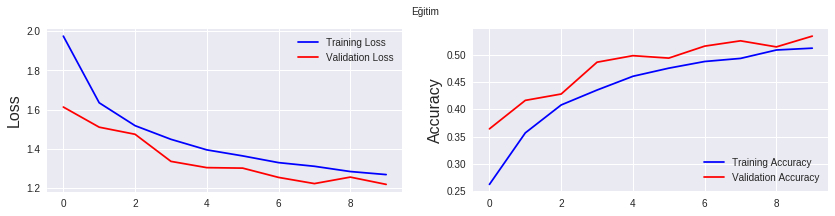

In [26]:
plt.figure(figsize=(14,3))
plt.subplot(1, 2, 1)
plt.suptitle('Eğitim', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(hist.history['loss'], color='b', label='Training Loss')
plt.plot(hist.history['val_loss'], color='r', label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(hist.history['acc'], color='b', label='Training Accuracy')
plt.plot(hist.history['val_acc'], color='r', label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

Kaggle submit edecek gibi **PrivateTest** örnekleri ile test edelim.

In [27]:
test = data[["emotion", "pixels"]][data["Usage"] == "PrivateTest"]
test["pixels"] = test["pixels"].apply(lambda im: np.fromstring(im, sep=' '))
test.head()

,emotion,pixels
32298,0,"[170.0, 118.0, 101.0, 88.0, 88.0, 75.0, 78.0, ..."
32299,5,"[7.0, 5.0, 8.0, 6.0, 7.0, 3.0, 2.0, 6.0, 5.0, ..."
32300,6,"[232.0, 240.0, 241.0, 239.0, 237.0, 235.0, 246..."
32301,4,"[200.0, 197.0, 149.0, 139.0, 156.0, 89.0, 111...."
32302,2,"[40.0, 28.0, 33.0, 56.0, 45.0, 33.0, 31.0, 78...."


In [0]:
x_test_private = np.vstack(test["pixels"].values)
y_test_private = np.array(test["emotion"])

In [29]:
x_test_private = x_test_private.reshape(-1, 48, 48, 1)
y_test_private = np_utils.to_categorical(y_test_private)
x_test_private.shape, y_test_private.shape

((3589, 48, 48, 1), (3589, 7))

In [30]:
score = model.evaluate(x_test_private, y_test_private, verbose=0)
print("PrivateTest üzerinde doğruluk başarımı:", score)

PrivateTest üzerinde doğruluk başarımı: [1.2157391933851436, 0.5335748119585426]


 **Veri kümseindeki eğitim kısmı ile modeli eğitip test için ayırılan veri ile test işlemlerini yaptık. **

---

## Farklı görüntülerle test işlemlerini yapıp sonuçları görselleştirelim.

In [0]:
from keras.models import load_model
from PIL import Image
from keras.preprocessing import image

**Daha önceki eğitimde kaydettiğimiz modelin hesapladığını öğrenilmiş ağırlık dosyasını kullanıyoruz.**

In [0]:
# en iyi ağırlıkları yükle
model_best = load_model(root + 'data/face_model.h5')

**Test görüntüsünü okuma ve yeniden boytlandırma işlemleri** ve **Kestirim sonucunun hesaplanması ve ekrana yazdırılması**

In [33]:
!ls 'Udemy_DerinOgrenmeyeGiris/Evrisimli_Sinir_Aglari/Duygu_Tanima/images'

bb1.jpg      javierbardem2.jpg	lotr2.jpg	  test4.jpg  yuz2.jpg
bb2.jpg      javierbardem.jpg	lotr3.jpg	  test5.jpg  yuz3.jpg
brando.png   kemal_sunal2.jpg	robertdeniro.jpg  test6.jpg
emojis	     kemal_sunal.jpg	test2.jpg	  test.jpg
hababam.jpg  lotr1.png		test3.jpg	  yuz1.jpg


In [34]:
#test_image=x_test_private[60] #eğer veri kümesinden bir görsel denemek isterseniz burada [] içine rastgele bir görsel numarası atayarak test edebilirsiniz!

image_path = root + "images/kemal_sunal2.jpg"

test_image_orjinal = image.load_img(image_path) # orjinal renkli görüntü


test_image = image.load_img(image_path, target_size=(48,48), grayscale=True)
test_data = image.img_to_array(test_image)

test_data = np.expand_dims(test_data, axis=0)
test_data = np.vstack([test_data])

results = model_best.predict(test_data, batch_size=1) 
results

array([[0.10772628, 0.00196493, 0.05336427, 0.57394415, 0.09346089,
        0.01981043, 0.14972906]], dtype=float32)

### SONUÇLARIN GÖRSELLEŞTİRİLMESİ ADIMLARI

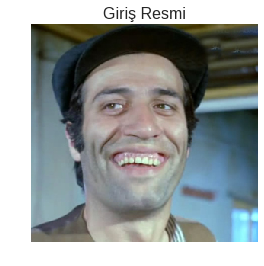

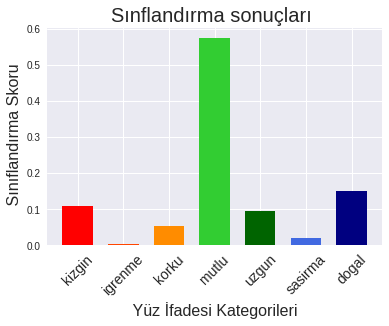

Sınıflandırma sonucu en yüksek oranla: mutlu


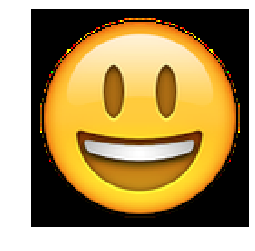

In [35]:
#sınıflarımız 7 adet duygu durumumuz
class_names = ['kizgin', 'igrenme', 'korku', 'mutlu', 'uzgun', 'sasirma', 'dogal']

ind = 0.1+0.6*np.arange(len(class_names))  #
width = 0.4  #bar genişliği

color_list = ['red','orangered','darkorange','limegreen','darkgreen','royalblue','navy']


# test resmimizi çizdirelim
plt.imshow(test_image_orjinal)
plt.title('Giriş Resmi', fontsize=16)
plt.axis('off')
plt.show()


#sonuçlarımızı renklendirelim
for i in range(len(class_names)):
  plt.bar(ind[i], results[0][i], width, color=color_list[i])
  
plt.title("Sınflandırma sonuçları ",fontsize=20)
plt.xlabel(" Yüz İfadesi Kategorileri ",fontsize=16)
plt.ylabel(" Sınıflandırma Skoru",fontsize=16)
plt.xticks(ind, class_names, rotation=45, fontsize=14)
plt.show()


print("Sınıflandırma sonucu en yüksek oranla:", class_names[np.argmax(results)])


# en yüksek skorlu duyguya karşılık emoji çizdirelim
emojis_img = image.load_img(root + 'images/emojis/%s.png' % str(class_names[np.argmax(results)]))

plt.imshow(emojis_img)
plt.axis('off')
plt.show()